In [19]:
import pandas as pd
from datetime import datetime
from zoe import cases, query, pickle, find_previous, plot_study, plot_study_evolution

In [156]:
uk_active_cases = query("SELECT * FROM uk_active_cases", index='date')
uk_active_cases.index = pd.to_datetime(uk_active_cases.index, format='%Y%m%d')
uk_active_cases

,cartodb_id,the_geom,the_geom_webmercator,corrected_covid_positive
date,,,,
2020-06-12,27148,None,None,88494.076159
2020-06-13,27149,None,None,81743.675417
2020-06-14,27150,None,None,75506.406094
2020-06-15,27151,None,None,69802.814307
2020-06-16,27152,None,None,64803.537413
...,...,...,...,...
2021-01-25,27375,None,None,559196.809906
2021-01-26,27376,None,None,540256.042750
2021-01-27,27377,None,None,522440.768994


In [157]:
curr_date = uk_active_cases.index.max()
print(pickle(uk_active_cases, 'uk_active_cases', curr_date))

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-29_2021-01-29-18-12.pickle


In [158]:
prev_date, prev_uk_active_cases = find_previous(curr_date)

/Users/chris/coronavirus/data/zoe_uk_active_cases_2021-01-28_2021-01-28-17-51.pickle


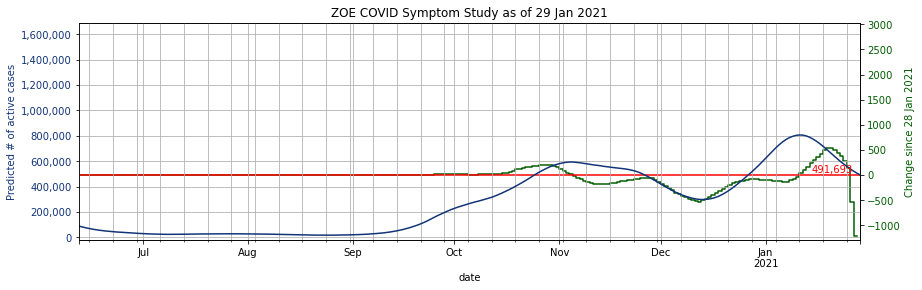

In [159]:
plot_study(curr_date, prev_date, uk_active_cases, prev_uk_active_cases)

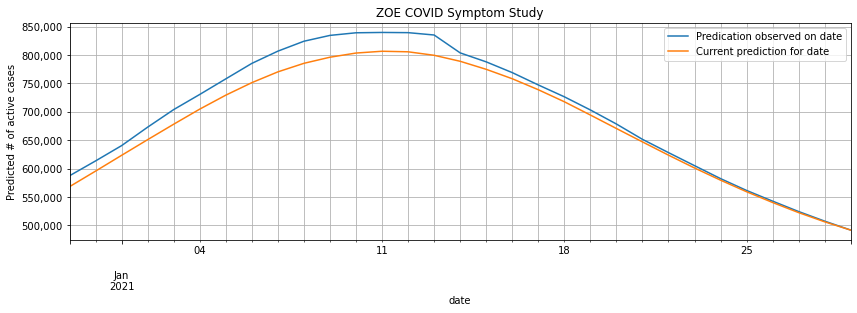

In [160]:
plot_study_evolution(curr_date, days=30)

In [161]:
prevalence_map = query("SELECT * FROM prevalence_map")
prevalence_map['percentage'] = prevalence_map['percentage'].astype(float)

In [162]:
for_date, = prevalence_map['data_status'].unique()
print(pickle(prevalence_map, 'prevalence_map', datetime.strptime(for_date, '%H:%M:%S %d-%m-%Y')))

/Users/chris/coronavirus/data/zoe_prevalence_map_2021-01-29_2021-01-29-18-13.pickle


In [163]:
prevalence_map[['lad16nm', 'lad16cd', 'percentage']].sort_values('percentage', ascending=False)[:10]

,lad16nm,lad16cd,percentage
323,North Lanarkshire,S12000044,2.445964
333,Flintshire,W06000005,2.270857
299,Wolverhampton,E08000031,2.098610
80,Hertsmere,E07000098,2.000993
109,East Dorset,E07000049,1.785441
339,Swansea,W06000011,1.735453
353,Kensington and Chelsea,E09000020,1.717110
368,Merton,E09000024,1.675463
175,Rossendale,E07000125,1.602870
307,Barnet,E09000003,1.571896
